# Modeling

In [1]:
# Let's start by importing our essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Employ a linear classifier on this dataset:

### 1.1 Fit a logisitic regression model to this data with the solver set to lbfgs. What is the accuracy score on the test set?

In [2]:
# Let's read in our dataset
# As we have two datasets, we can read in the train dataset as a variable
train_data= pd.read_csv('data/train_dataframe.csv')

In [3]:
train_data

Additional_Number_of_Scoring  Average_Score  \
0                             220.0            9.1   
1                            1190.0            7.5   
2                             299.0            8.3   
3                              87.0            9.0   
4                             317.0            7.6   
...                             ...            ...   
13646                         279.0            8.2   
13647                         641.0            8.7   
13648                         359.0            9.3   
13649                         704.0            8.3   
13650                         807.0            8.5   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                   20.0                    902.0   
1                                    5.0                   5180.0   
2                                   81.0                   1361.0   
3                                   17.0                    355.0   
4                                   14.0                   1458.0   
...                                  ...                      ...   
13646                               55.0                   1140.0   
13647                                0.0                   2130.0   
13648                               45.0                   1694.0   
13649                               16.0                   2443.0   
13650                                0.0                   3269.0   

       Review_Total_Positive_Word_Counts  \
0                                   21.0   
1                                   23.0   
2                                   27.0   
3                                   13.0   
4                                    0.0   
...                                  ...   
13646                                8.0   
13647                                5.0   
13648                               28.0   
13649                               24.0   
13650                               10.0   

       Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                             1.0              275.0   
1                                             6.0              481.0   
2                                             4.0              672.0   
3                                             7.0              412.0   
4                                             1.0              499.0   
...                                           ...                ...   
13646                                        13.0              462.0   
13647                                         3.0              338.0   
13648                                         9.0              452.0   
13649                                        19.0              179.0   
13650                                         2.0              456.0   

             lat       lng  Review_Month  ...  p_working  p_world  p_worth  \
0      51.494308 -0.175558          11.0  ...        0.0      0.0      0.0   
1      51.514879 -0.160650           4.0  ...        0.0      0.0      0.0   
2      51.521009 -0.123097          10.0  ...        0.0      0.0      0.0   
3      51.499749 -0.161524           6.0  ...        0.0      0.0      0.0   
4      51.516114 -0.174952           3.0  ...        0.0      0.0      0.0   
...          ...       ...           ...  ...        ...      ...      ...   
13646  51.492733 -0.157371           4.0  ...        0.0      0.0      0.0   
13647  51.542605 -0.007271           8.0  ...        0.0      0.0      0.0   
13648  51.508236 -0.126196           5.0  ...        0.0      0.0      0.0   
13649  51.491959 -0.220096           2.0  ...        0.0      0.0      0.0   
13650  51.493236 -0.126908           5.0  ...        0.0      0.0      0.0   

       p_wouldn  p_year   p_years  p_yes  p_young  p_yummy  Reviewer_Score  
0           0.0     0.0  0.000000    0.0      0.0      0.0             1.0  
1           0.0     0.0  0.425849    0.0    

In [4]:
# Similarly putting in our test data as a variable
test_data= pd.read_csv('data/test_dataframe.csv')
test_data

Additional_Number_of_Scoring  Average_Score  \
0                           2288.0            8.1   
1                             61.0            9.0   
2                            974.0            9.0   
3                            838.0            8.4   
4                            879.0            8.8   
...                            ...            ...   
3408                         788.0            8.5   
3409                         377.0            8.5   
3410                        1427.0            8.8   
3411                        1258.0            9.4   
3412                        1444.0            7.8   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  24.0                   9568.0   
1                                   0.0                    263.0   
2                                  20.0                   3040.0   
3                                  23.0                   3274.0   
4                                  48.0                   2768.0   
...                                 ...                      ...   
3408                               40.0                   2635.0   
3409                               27.0                   1363.0   
3410                                0.0                   4305.0   
3411                               20.0                   4204.0   
3412                               33.0                   5726.0   

      Review_Total_Positive_Word_Counts  \
0                                  16.0   
1                                  21.0   
2                                  20.0   
3                                  29.0   
4                                  51.0   
...                                 ...   
3408                                7.0   
3409                                4.0   
3410                                4.0   
3411                               31.0   
3412                               55.0   

      Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                            1.0              527.0   
1                                            1.0              527.0   
2                                           12.0              485.0   
3                                            5.0              415.0   
4                                            1.0              385.0   
...                                          ...                ...   
3408                                         7.0              150.0   
3409                                         1.0              501.0   
3410                                         1.0               48.0   
3411                                         3.0               62.0   
3412                                         8.0              166.0   

            lat       lng  Review_Month  ...  p_working  p_world  p_worth  \
0     51.511099 -0.120867           2.0  ...        0.0      0.0      0.0   
1     51.522636 -0.160287           2.0  ...        0.0      0.0      0.0   
2     51.500732 -0.016550           4.0  ...        0.0      0.0      0.0   
3     51.495666 -0.145279           6.0  ...        0.0      0.0      0.0   
4     51.508354  0.019886           7.0  ...        0.0      0.0      0.0   
...         ...       ...           ...  ...        ...      ...      ...   
3408  51.512763 -0.099716           3.0  ...        0.0      0.0      0.0   
3409  51.515864 -0.120063           3.0  ...        0.0      0.0      0.0   
3410  51.557696 -0.283526           6.0  ...        0.0      0.0      0.0   
3411  51.502435 -0.000250           6.0  ...        0.0      0.0      0.0   
3412  51.493508 -0.183435           2.0  ...        0.0      0.0      0.0   

      p_wouldn  p_year  p_years  p_yes  p_young  p_yummy  Reviewer_Score  
0          0.0     0.0      0.0    0.0      0.0      0.0             0.0  
1          0.0     0.0      0.0    0.0      0.0      0.0             1.0  
2          0.0     0.0      0.0 

#### Let's create our X_train,  X_test,  y_train, Y_test from the datasets we read in.

In [5]:
# Selecting our features for train set except our target column
X_train= train_data.drop(columns= ['Reviewer_Score'])
X_train

Additional_Number_of_Scoring  Average_Score  \
0                             220.0            9.1   
1                            1190.0            7.5   
2                             299.0            8.3   
3                              87.0            9.0   
4                             317.0            7.6   
...                             ...            ...   
13646                         279.0            8.2   
13647                         641.0            8.7   
13648                         359.0            9.3   
13649                         704.0            8.3   
13650                         807.0            8.5   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                   20.0                    902.0   
1                                    5.0                   5180.0   
2                                   81.0                   1361.0   
3                                   17.0                    355.0   
4                                   14.0                   1458.0   
...                                  ...                      ...   
13646                               55.0                   1140.0   
13647                                0.0                   2130.0   
13648                               45.0                   1694.0   
13649                               16.0                   2443.0   
13650                                0.0                   3269.0   

       Review_Total_Positive_Word_Counts  \
0                                   21.0   
1                                   23.0   
2                                   27.0   
3                                   13.0   
4                                    0.0   
...                                  ...   
13646                                8.0   
13647                                5.0   
13648                               28.0   
13649                               24.0   
13650                               10.0   

       Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                             1.0              275.0   
1                                             6.0              481.0   
2                                             4.0              672.0   
3                                             7.0              412.0   
4                                             1.0              499.0   
...                                           ...                ...   
13646                                        13.0              462.0   
13647                                         3.0              338.0   
13648                                         9.0              452.0   
13649                                        19.0              179.0   
13650                                         2.0              456.0   

             lat       lng  Review_Month  ...  p_worked  p_working  p_world  \
0      51.494308 -0.175558          11.0  ...       0.0        0.0      0.0   
1      51.514879 -0.160650           4.0  ...       0.0        0.0      0.0   
2      51.521009 -0.123097          10.0  ...       0.0        0.0      0.0   
3      51.499749 -0.161524           6.0  ...       0.0        0.0      0.0   
4      51.516114 -0.174952           3.0  ...       0.0        0.0      0.0   
...          ...       ...           ...  ...       ...        ...      ...   
13646  51.492733 -0.157371           4.0  ...       0.0        0.0      0.0   
13647  51.542605 -0.007271           8.0  ...       0.0        0.0      0.0   
13648  51.508236 -0.126196           5.0  ...       0.0        0.0      0.0   
13649  51.491959 -0.220096           2.0  ...       0.0        0.0      0.0   
13650  51.493236 -0.126908           5.0  ...       0.0        0.0      0.0   

       p_worth  p_wouldn  p_year   p_years  p_yes  p_young  p_yummy  
0          0.0       0.0     0.0  0.000000    0.0      0.0      0.0  
1          0.0       0.0     0.0  0.425849    

In [6]:
# Selecting our target variable for the train set
y_train= train_data['Reviewer_Score']
y_train

0        1.0
1        1.0
2        0.0
3        1.0
4        0.0
        ... 
13646    0.0
13647    1.0
13648    1.0
13649    0.0
13650    1.0
Name: Reviewer_Score, Length: 13651, dtype: float64

In [7]:
# Similarly our test sets can also be stated
X_test= test_data.drop('Reviewer_Score', axis= 1)
X_test.sample(5)

Additional_Number_of_Scoring  Average_Score  \
2038                         235.0            8.2   
2820                         807.0            8.5   
288                          540.0            8.9   
2028                        1831.0            8.1   
771                          495.0            8.5   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
2038                               23.0                   1003.0   
2820                                0.0                   3269.0   
288                                 2.0                   2274.0   
2028                                0.0                   7105.0   
771                                 0.0                   2300.0   

      Review_Total_Positive_Word_Counts  \
2038                               10.0   
2820                               19.0   
288                                 7.0   
2028                               15.0   
771                                 3.0   

      Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
2038                                         7.0              599.0   
2820                                         3.0              555.0   
288                                          2.0              148.0   
2028                                        13.0              648.0   
771                                          1.0              604.0   

            lat       lng  Review_Month  ...  p_worked  p_working  p_world  \
2038  51.491908 -0.168440          12.0  ...       0.0        0.0      0.0   
2820  51.493236 -0.126908           1.0  ...       0.0        0.0      0.0   
288   51.555368 -0.286495           3.0  ...       0.0        0.0      0.0   
2028  51.499046 -0.191707          10.0  ...       0.0        0.0      0.0   
771   51.516516 -0.150973          12.0  ...       0.0        0.0      0.0   

      p_worth  p_wouldn  p_year  p_years  p_yes  p_young  p_yummy  
2038      0.0       0.0     0.0      0.0    0.0      0.0      0.0  
2820      0.0       0.0     0.0      0.0    0.0      0.0      0.0  
288       0.0       0.0     0.0      0.0    0.0      0.0      0.0  
2028      0.0       0.0     0.0      0.0    0.0      0.0      0.0  
771       0.0       0.0     0.0      0.0    0.0      0.0      0.0  

[5 rows x 2586 columns]

In [8]:
y_test= test_data['Reviewer_Score']
y_test.sample(5)

2009    1.0
2600    1.0
2724    1.0
2319    1.0
173     0.0
Name: Reviewer_Score, dtype: float64

Now, let's try creating a Logistic Regression model and fit our data.

In [9]:
# Let's import our logistic model 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
# Let's also take out any warnings that extends our results display
#Filtering out  warnings
import warnings
warnings.filterwarnings('ignore')

In [180]:
# Initiating our model
log= LogisticRegression(solver= 'lbfgs', random_state= 5)

# Fitting our model
fitted_model= log.fit(X_train, y_train)

# We can check our scores on training set
print(f" The accuracy score for train set is: {log.score(X_train, y_train)}")

# Now, let's check our test scores
print(f" The accuracy score for test set is: {log.score(X_test,y_test)}")

 The accuracy score for train set is: 0.7222181525162992
 The accuracy score for test set is: 0.7231174919425725


#### Here, we have an accuracy of ~72% on our test test for our Logistic Regression model which shows that the model fits well since the train and test scores are close to each other.

We can try a range of C values for tuning our logistic regression model to get better accuracy.

In [176]:
# Let's try a modest range of C values
c_values = [10**n for n in range(-4,4)]

# Set up empty lists
train_accuracies = []
test_accuracies = []

# Iterate over the C values
for value in c_values:
    
    # Instantiate a log reg and fit to the train set
    logreg = LogisticRegression(C=value, random_state=24).fit(X_train, y_train)
    
    # Score on the train set and append this accuracy to its respective list
    train_accuracies.append(logreg.score(X_train, y_train))
    
    # Score on the validation set and append this accuracy to its respective list
    test_accuracies.append(logreg.score(X_test, y_test))

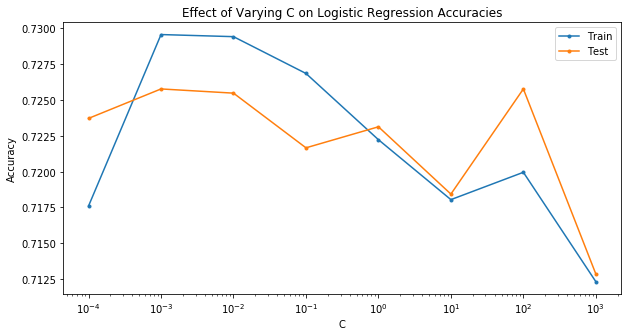

In [178]:
# Plot the accuracies
plt.figure(figsize=(10, 5))
plt.plot(c_values, train_accuracies, label='Train', marker='.')
plt.plot(c_values, test_accuracies, label='Test', marker='.')
plt.legend()
plt.xscale('log') # Put the x-axis on a log scale; this is important because the C values vary in orders of magnitude
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Effect of Varying C on Logistic Regression Accuracies')
plt.show()

From the above graph we can see that the best value appears to be 100 as it fits the model better, let's try it out and re-check our accuracy.

In [179]:
# Initiating our model
log= LogisticRegression(solver= 'lbfgs', random_state= 5, C= 100)

# Fitting our model
fitted_model= log.fit(X_train, y_train)

# We can check our scores on training set
print(f" The accuracy score for train set is: {log.score(X_train, y_train)}")

# Now, let's check our test scores
print(f" The accuracy score for test set is: {log.score(X_test,y_test)}")

 The accuracy score for train set is: 0.7199472566112373
 The accuracy score for test set is: 0.7257544682097861


Well, this doesn't seem to change much looks like I played myself, so we can say **the best accuracy for the train set we were able to achieve was 0.725**

### 1.2 What are the 20 words most predictive of a good review (from the positive review column)? What are the 20 words most predictive with a bad review (from the negative review column)? Use the regression coefficients to answer this question

Let's get our columns which has positive reviews in them. Since we can see from the data that the columns starting with a 'p' is a positive and columns starting with a 'n' is a negative review.

In [15]:
# Let's extract all positive review columns
positive_columns= X_train[X_train.columns[pd.Series(X_train.columns).str.startswith('p')]]
positive_columns


p_02  p_10  p_100  p_12  p_15  p_1st  p_20  p_24  p_2nd  p_30  ...  \
0       0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0  ...   
1       0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0  ...   
2       0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0  ...   
3       0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0  ...   
4       0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0  ...   
...     ...   ...    ...   ...   ...    ...   ...   ...    ...   ...  ...   
13646   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0  ...   
13647   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0  ...   
13648   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0  ...   
13649   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0  ...   
13650   0.0   0.0    0.0   0.0   0.0    0.0   0.0   0.0    0.0   0.0  ...   

       p_worked  p_working  p_world  p_worth  p_wouldn  p_year   p_years  \
0           0.0        0.0      0.0      0.0       0.0     0.0  0.000000   
1           0.0        0.0      0.0      0.0       0.0     0.0  0.425849   
2           0.0        0.0      0.0      0.0       0.0     0.0  0.000000   
3           0.0        0.0      0.0      0.0       0.0     0.0  0.000000   
4           0.0        0.0      0.0      0.0       0.0     0.0  0.000000   
...         ...        ...      ...      ...       ...     ...       ...   
13646       0.0        0.0      0.0      0.0       0.0     0.0  0.000000   
13647       0.0        0.0      0.0      0.0       0.0     0.0  0.000000   
13648       0.0        0.0      0.0      0.0       0.0     0.0  0.000000   
13649       0.0        0.0      0.0      0.0       0.0     0.0  0.000000   
13650       0.0        0.0      0.0      0.0       0.0     0.0  0.000000   

       p_yes  p_young  p_yummy  
0        0.0      0.0      0.0  
1        0.0      0.0      0.0  
2        0.0      0.0      0.0  
3        0.0      0.0      0.0  
4        0.0      0.0      0.0  
...      ...      ...      ...  
13646    0.0      0.0      0.0  
13647    0.0      0.0      0.0  
13648    0.0      0.0      0.0  
13649    0.0      0.0      0.0  
13650    0.0      0.0      0.0  

[13651 rows x 893 columns]

Let's fit a logisitic regression to it so that we can extract the coeffiecents.

In [16]:
from sklearn.linear_model import LogisticRegression
positive_columns_log= LogisticRegression(solver= 'lbfgs')
positive_columns_log.fit(positive_columns, y_train)
positive_columns_log.coef_

array([[ 1.72365803e+00,  1.57946587e-01,  1.15489977e+00,
         6.27480300e-01,  1.08683443e-01,  2.19776057e-01,
        -7.00499085e-01, -6.11383937e-01,  2.81097466e-01,
        -1.86412215e-01,  2.82611305e-01,  1.37324804e+00,
         4.03320747e-01, -2.42996794e-02, -5.94138917e-01,
         6.47174495e-01,  2.93414770e-01,  2.21974692e-01,
         8.16876031e-01, -9.96804629e-01,  8.97561398e-02,
         7.15440822e-01,  6.17047850e-01, -3.56144585e-01,
        -6.19308244e-01,  4.14193193e-01,  2.53013594e+00,
         1.38732409e+00,  3.29443979e-01,  1.19163209e+00,
        -3.15323454e-02,  7.59746241e-01,  2.99574848e-01,
        -1.86185506e-01,  9.73313410e-02,  4.87593414e-01,
         3.23253381e-01,  6.07498999e-01, -2.81906088e-01,
         4.85130771e-02,  5.08524598e-01, -4.07883282e-01,
         2.07678743e-01,  5.32432064e-01, -2.15262134e-01,
        -7.81286352e-01,  1.41671928e+00,  1.58689578e-01,
         1.71313826e+00,  1.01840102e+00, -2.84416665e-0

Now, we have our coefficients let's create a table to visualuze it better.

In [19]:
import pandas as pd
positive_colums_table = pd.DataFrame(list(positive_columns.columns)).copy()  
        
positive_colums_table.insert(len(positive_colums_table.columns),'Log_coefs', positive_columns_log.coef_.transpose())
positive_colums_table

0  Log_coefs
0       p_02   1.723658
1       p_10   0.157947
2      p_100   1.154900
3       p_12   0.627480
4       p_15   0.108683
..       ...        ...
888   p_year   1.103964
889  p_years   0.575434
890    p_yes   0.514765
891  p_young  -0.269912
892  p_yummy   0.326163

[893 rows x 2 columns]

Now we have formed the table we can sort the values with the log coefficients and take the top 20 with the highest values to be our most predictive from our positive review column

In [189]:
positive_colums_table= positive_colums_table.sort_values('Log_coefs',ascending= False).head(20)
positive_colums_table

0  Log_coefs
26        p_amazing   2.530136
285     p_fantastic   2.403615
829      p_upgraded   2.319480
279      p_fabulous   2.136299
735    p_spotlessly   2.106950
747          p_stay   2.098693
475         p_loved   1.973446
817       p_trouble   1.924807
559   p_outstanding   1.923572
646     p_recommend   1.913781
880     p_wonderful   1.876752
615  p_professional   1.859450
767        p_superb   1.799427
278           p_fab   1.756532
262     p_excellent   1.729730
0              p_02   1.723658
48      p_attention   1.713138
99      p_brilliant   1.703787
444         p_light   1.698889
578       p_perfect   1.689806

In [192]:
positive_colums_table[0].values

array(['p_amazing', 'p_fantastic', 'p_upgraded', 'p_fabulous',
       'p_spotlessly', 'p_stay', 'p_loved', 'p_trouble', 'p_outstanding',
       'p_recommend', 'p_wonderful', 'p_professional', 'p_superb',
       'p_fab', 'p_excellent', 'p_02', 'p_attention', 'p_brilliant',
       'p_light', 'p_perfect'], dtype=object)

**These names above are the top 20 most predictive names of a good review (from the positive review column)**

Now, let's do the same thing for our negative review.

In [21]:
# Let's extract all negative review columns
negative_columns= X_train[X_train.columns[pd.Series(X_train.columns).str.startswith('n')]]
negative_columns


n_00  n_10  n_100  n_11  n_11am  n_11pm  n_12  n_13  n_15  n_16  ...  \
0       0.0   0.0    0.0   0.0     0.0     0.0   0.0   0.0   0.0   0.0  ...   
1       0.0   0.0    0.0   0.0     0.0     0.0   0.0   0.0   0.0   0.0  ...   
2       0.0   0.0    0.0   0.0     0.0     0.0   0.0   0.0   0.0   0.0  ...   
3       0.0   0.0    0.0   0.0     0.0     0.0   0.0   0.0   0.0   0.0  ...   
4       0.0   0.0    0.0   0.0     0.0     0.0   0.0   0.0   0.0   0.0  ...   
...     ...   ...    ...   ...     ...     ...   ...   ...   ...   ...  ...   
13646   0.0   0.0    0.0   0.0     0.0     0.0   0.0   0.0   0.0   0.0  ...   
13647   0.0   0.0    0.0   0.0     0.0     0.0   0.0   0.0   0.0   0.0  ...   
13648   0.0   0.0    0.0   0.0     0.0     0.0   0.0   0.0   0.0   0.0  ...   
13649   0.0   0.0    0.0   0.0     0.0     0.0   0.0   0.0   0.0   0.0  ...   
13650   0.0   0.0    0.0   0.0     0.0     0.0   0.0   0.0   0.0   0.0  ...   

       n_world  n_worn  n_worse  n_worst  n_worth  n_wouldn  n_wrong  n_year  \
0          0.0     0.0      0.0      0.0      0.0       0.0      0.0     0.0   
1          0.0     0.0      0.0      0.0      0.0       0.0      0.0     0.0   
2          0.0     0.0      0.0      0.0      0.0       0.0      0.0     0.0   
3          0.0     0.0      0.0      0.0      0.0       0.0      0.0     0.0   
4          0.0     0.0      0.0      0.0      0.0       0.0      0.0     0.0   
...        ...     ...      ...      ...      ...       ...      ...     ...   
13646      0.0     0.0      0.0      0.0      0.0       0.0      0.0     0.0   
13647      0.0     0.0      0.0      0.0      0.0       0.0      0.0     0.0   
13648      0.0     0.0      0.0      0.0      0.0       0.0      0.0     0.0   
13649      0.0     0.0      0.0      0.0      0.0       0.0      0.0     0.0   
13650      0.0     0.0      0.0      0.0      0.0       0.0      0.0     0.0   

       n_years  n_young  
0          0.0      0.0  
1          0.0      0.0  
2          0.0      0.0  
3          0.0      0.0  
4          0.0      0.0  
...        ...      ...  
13646      0.0      0.0  
13647      0.0      0.0  
13648      0.0      0.0  
13649      0.0      0.0  
13650      0.0      0.0  

[13651 rows x 1284 columns]

Let's fit a logisitic regression to it and extract the coeffiecents

In [22]:
from sklearn.linear_model import LogisticRegression
negative_columns_log= LogisticRegression(solver= 'lbfgs')
negative_columns_log.fit(negative_columns, y_train)
negative_columns_log.coef_

array([[-0.90880864, -0.01795346,  0.41040289, ..., -0.21685947,
        -0.5973661 ,  0.22713818]])

Let's create a similar table with all our coefficients and names.

In [23]:
import pandas as pd
negative_colums_table = pd.DataFrame(list(negative_columns.columns)).copy()  
        
negative_colums_table.insert(len(negative_colums_table.columns),'Log_coefs', negative_columns_log.coef_.transpose())
negative_colums_table

0  Log_coefs
0         n_00  -0.908809
1         n_10  -0.017953
2        n_100   0.410403
3         n_11  -0.465445
4       n_11am  -0.054704
...        ...        ...
1279  n_wouldn   0.020863
1280   n_wrong  -0.565288
1281    n_year  -0.216859
1282   n_years  -0.597366
1283   n_young   0.227138

[1284 rows x 2 columns]

Now we have formed the table we can sort the values with the log coefficients and take the top 20 with the lowest values to be our most predictive from our negative review column. As the value of the log coefficients decreases the stronger the  relationship is between the target variable. So the lowest values would be our most predictive names.

In [202]:
negative_colums_table= negative_colums_table.sort_values('Log_coefs',ascending= True).head(20)
negative_colums_table

0  Log_coefs
1072       n_staff  -3.407419
344        n_dirty  -3.144641
957         n_room  -2.808019
778          n_old  -2.685963
313        n_dated  -2.677063
1153       n_tired  -2.614560
1081        n_star  -2.551842
1152        n_tiny  -2.330793
160       n_broken  -2.210212
113        n_basic  -2.188853
119          n_bed  -2.108450
800   n_overpriced  -2.078492
1027       n_sleep  -2.043112
326       n_deluxe  -2.019164
306     n_customer  -2.017847
1140    n_terrible  -2.010569
958        n_rooms  -1.950266
998       n_shabby  -1.916603
850         n_poor  -1.915644
1233       n_walls  -1.842557

In [204]:
negative_colums_table[0].values

array(['n_staff', 'n_dirty', 'n_room', 'n_old', 'n_dated', 'n_tired',
       'n_star', 'n_tiny', 'n_broken', 'n_basic', 'n_bed', 'n_overpriced',
       'n_sleep', 'n_deluxe', 'n_customer', 'n_terrible', 'n_rooms',
       'n_shabby', 'n_poor', 'n_walls'], dtype=object)

**These names above are the top 20 words most predictive with a bad review (from the negative review column)**

### 1.3 Reduce the dimensionality of the dataset using PCA, what is the relationship between the number of dimensions and run-time for a logistic regression?

In [ ]:
# Let's import our scalera and PCA functions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [31]:
# Let's check our shape of our dataset before we proceed
X_train.shape

(13651, 2586)

As we see that we have 2586 columns our initial PCA would have 2586 features. But before fitting our PCA it's best practice to scale our data first. 

In [32]:
# Initiate our scaler
scaler = StandardScaler()

# We only fit our scaler to train data to avoid leakage
scaler.fit(X_train)

# Transforming our train and test data
X_train_trans= scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

In [33]:
# Initiating our PCA
my_pca = PCA(n_components=2586)

# Fitting our transformed data 
my_pca.fit(X_train_trans)

# Transforming
X_PCA = my_pca.transform(X_train_trans)

In [34]:
# To display all our values  we can run this code:
import sys
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)

In [35]:
# We can check the explained variance ratio to select our components
expl_var = my_pca.explained_variance_ratio_
print(expl_var)

[2.49711543e-03 1.82082097e-03 1.61296613e-03 1.40730260e-03
 1.32696424e-03 1.26852520e-03 1.17829716e-03 1.14886492e-03
 1.14217985e-03 1.12113351e-03 1.10283248e-03 1.07866920e-03
 1.07016955e-03 1.04507791e-03 1.04002015e-03 1.02568662e-03
 1.01425253e-03 1.00737680e-03 1.00220925e-03 9.87473816e-04
 9.81621282e-04 9.68710198e-04 9.61354044e-04 9.58403552e-04
 9.54774009e-04 9.48348585e-04 9.39914724e-04 9.33544417e-04
 9.30383286e-04 9.24397734e-04 9.20738941e-04 9.15440442e-04
 9.10197858e-04 9.08415113e-04 9.05907650e-04 8.99169934e-04
 8.93730362e-04 8.91452778e-04 8.89325182e-04 8.83752646e-04
 8.79751421e-04 8.76638662e-04 8.72828904e-04 8.70752573e-04
 8.65902694e-04 8.63809895e-04 8.63630490e-04 8.59338749e-04
 8.57997529e-04 8.56419078e-04 8.53127527e-04 8.49360750e-04
 8.47037915e-04 8.43742363e-04 8.40916892e-04 8.39829866e-04
 8.39014491e-04 8.36593591e-04 8.34559568e-04 8.33352162e-04
 8.32133201e-04 8.29496184e-04 8.28529796e-04 8.26168778e-04
 8.24765016e-04 8.227555

Though, this doesn't explain much our best bet is to look at the cumulative of our explained variance, this shows how many components explain the most variance which goes upto 1 to be our whole dataset. 

In [207]:
# Looking at our cumulative variance
expl_var_cumulative = my_pca.explained_variance_ratio_.cumsum()
print(expl_var_cumulative)

[0.00249712 0.00431794 0.0059309  0.00733821 0.00866517 0.00993369
 0.01111199 0.01226086 0.01340304 0.01452417 0.015627   0.01670567
 0.01777584 0.01882092 0.01986094 0.02088663 0.02190088 0.02290826
 0.02391046 0.02489794 0.02587956 0.02684827 0.02780962 0.02876803
 0.0297228  0.03067115 0.03161106 0.03254461 0.03347499 0.03439939
 0.03532013 0.03623557 0.03714577 0.03805418 0.03896009 0.03985926
 0.04075299 0.04164444 0.04253377 0.04341752 0.04429727 0.04517391
 0.04604674 0.04691749 0.0477834  0.04864721 0.04951084 0.05037017
 0.05122817 0.05208459 0.05293772 0.05378708 0.05463412 0.05547786
 0.05631878 0.05715861 0.05799762 0.05883421 0.05966877 0.06050213
 0.06133426 0.06216376 0.06299229 0.06381845 0.06464322 0.06546597
 0.06628794 0.06710833 0.06792566 0.0687414  0.06955633 0.07036884
 0.07118058 0.07199004 0.07279798 0.07360546 0.07441162 0.07521526
 0.07601774 0.07681905 0.07761931 0.07841719 0.07921117 0.08000464
 0.0807976  0.08158988 0.08238064 0.08316939 0.08395789 0.0847

Although we see our variance it's hard to pin point the value to our  number of component, so let's extract the component number which explains almost 90% variance in our data.

In [211]:
np.where(expl_var_cumulative>= 0.9)

(array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
        1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
        1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
        2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
        2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
        2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035,
        2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046,
        2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057,
        2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068,
        2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079,
        2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090,
        2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101,
        2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112,
        2113, 2114, 2115, 2116, 2117, 

So it's apparent now that above 1970 components our variance is 90% of the whole data.

We can also look at the 'Elbow scree plot' to visualize how our variance varies.

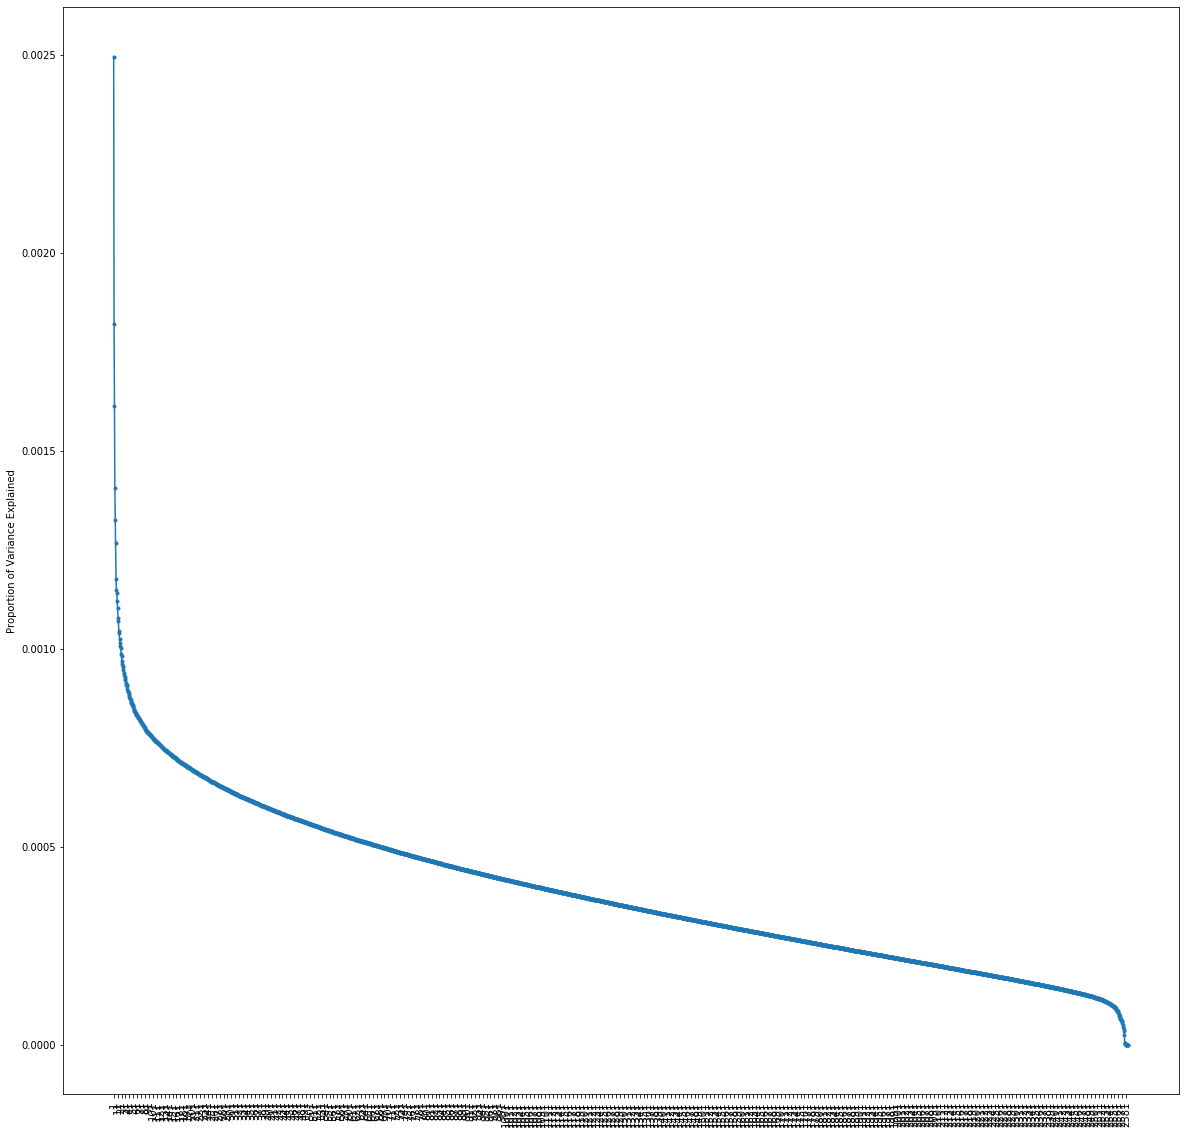

In [215]:
plt.figure(figsize= (20,20))
plt.plot(range(1,2587),expl_var,marker='.')
#plt.xlabelh('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,2587,10), rotation= 'vertical')
plt.tight_layout
plt.show()

The plot appears to look really compact and the curve follows a downward trend which doesn't go flat until the end, so let's stick with our values obtained from cumulative variance.

For getting the relationship between components and run time we need the time parameter to time our run time for queries.

In [39]:
# Importing time
import time

Let's fit, transform and score our model on our original number of components to check our score and run time.

In [229]:
%%time
# Initiate our scaling our data first
scaler = StandardScaler()

# We only fit our scaler to train data to avoid leakage
scaler.fit(X_train)

# Transforming our train and test data
X_train_trans= scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

my_pca2 = PCA(n_components=2586)

# Fitting our transformed data
my_pca2.fit(X_train_trans)

# 3. Transforming
X_train_PCA = my_pca2.transform(X_train_trans)
X_test_PCA = my_pca2.transform(X_test_trans)

Wall time: 2min


In [262]:
%%time
# Let's check out runtime for logistic regression  for all our components
# Instantiate and train the classifier
logistic_regression_model = LogisticRegression(random_state= 5)
logistic_regression_model.fit(X_train_PCA, y_train)

Wall time: 12.9 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We got a run time of 12.9 seconds with all our components for logistic regression.

Let's check our accuracy with for our logistic regression with all components

In [263]:
# Evaluate it
print(f'The train accuracy is: {logistic_regression_model.score(X_train_PCA, y_train):0.3f}')
print(f'The test accuracy is: {logistic_regression_model.score(X_test_PCA, y_test):0.3f}')

The train accuracy is: 0.867
The test accuracy is: 0.750


We get a 0.75 accuracy for our test set with all our components. Now let's try reducing the number of components and checking our run time and accuracy.

We can try with cutting off 1000 components and checking our accuracy whether it's reduced or increased.

In [233]:
%%time
my_pca3 = PCA(n_components=1586)

# 2. Fit
my_pca3.fit(X_train_trans)

# 3. Transform
X_train_2PCA = my_pca3.transform(X_train_trans)
X_test_2PCA = my_pca3.transform(X_test_trans)


Wall time: 3min 42s


Let's fit in our model and check if the run time decreased

In [264]:
%%time
# Instantiate and train the classifier
logistic_regression_model = LogisticRegression(random_state= 5)
logistic_regression_model.fit(X_train_2PCA, y_train)


Wall time: 4.59 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [265]:
# Evaluate it

print(f'The train accuracy is: {logistic_regression_model.score(X_train_2PCA,y_train):0.3f}')
print(f'The test accuracy is: {logistic_regression_model.score(X_test_2PCA,y_test):0.3f}')

The train accuracy is: 0.839
The test accuracy is: 0.771


Here, we get a better accuracy and decreased run time with reduced components. Now let's try with the number of component we found that had 90% variance explained in total, and check our scores and run time.

In [255]:
%%time
# Initate
my_pca4 = PCA(n_components=1970)

# 2. Fit (mathematical calculations are made at this step) 
my_pca4.fit(X_train_trans)

# 3. Transform
X_train_3PCA = my_pca4.transform(X_train_trans)
X_test_3PCA = my_pca4.transform(X_test_trans)


Wall time: 4min 11s


In [266]:
%%time
# Instantiate and train the classifier
logistic_regression_model = LogisticRegression(random_state= 5)
logistic_regression_model.fit(X_train_3PCA, y_train)

Wall time: 5.28 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We get a run time for 5.8 seconds. for 1970 components.

As we can comclude now that for 2586 components the run time for Logistic regression was 12.6 seconds.\
For 1970 it was 5.8 seconds.\
For 1586 it was 3.56 seconds.

#### So we can say that the relationship is directly proportional bewtween the number of dimensions and run time for Logistic regression because as the number of dimensions go down the run time goes down too.

In [267]:
# Evaluate it

print(f'The train accuracy is: {logistic_regression_model.score(X_train_3PCA,y_train):0.3f}')
print(f'The test accuracy is: {logistic_regression_model.score(X_test_3PCA,y_test):0.3f}')

The train accuracy is: 0.849
The test accuracy is: 0.759


For the scoring aspect we can say that the score change is not really prominent between 1586 and 1970 components but does improve a bit for 1970 as we incorporate more components.

### 1.4 List one advantage and one disadvantage of dimensionality reduction

#### Advantage: 
Dimension Reduction helps in eliminating multi collinearity and removing redundant features.

#### Disadvantage:
PCA fails in cases where mean and covariance are not enough to define datasets

### 2 Employ a K-Nearest Neighbour classifier on this dataset:

### 2.1 Fit a KNN model to this data. What is the accuracy score on the test set?

Let's scale our data first to get better results for KNN

In [50]:
# Initiating, fitting and transforming our scaler 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trans= scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

In [268]:
%%time
# Importing library for KNN
from sklearn.neighbors import KNeighborsClassifier

# instantiate
my_knn = KNeighborsClassifier() # By default the n_neighbors is 5

#fit
my_knn.fit(X_train, y_train)

#Scoring 
train_accuracy = my_knn.score(X_train_trans, y_train)
test_accuracy = my_knn.score(X_test_trans, y_test)


Wall time: 3min 33s


In [269]:
print('Train accuracy : ', train_accuracy)
print('Test accuracy :', test_accuracy)

Train accuracy :  0.5811295875760017
Test accuracy : 0.5813067682390859


The run time we achieved for KNN with 5 observations i.e neighbors was 3min 33 seconds

#### The accuracy score with the transformed data for KNN with 5 neighbors on the test set is 0.58

### 2.2 KNN is a computationally expensive model. Reduce the number of observations (data points) in the dataset. What is the relationship between the number of observations and run-time for KNN?

In [54]:
# Let's check the shape of our X_train
X_train.shape

(13651, 2586)

In [55]:
# # Let's check the shape of our y_train
y_train.shape

(13651,)

Since we have to check our score for different observations, for the first set let's cut our X_train and y_train to 8000 rows and calculate our run time.

In [56]:
X_train_cut1= X_train.iloc[0:8000]
X_train_cut1

Additional_Number_of_Scoring  Average_Score  \
0                            220.0            9.1   
1                           1190.0            7.5   
2                            299.0            8.3   
3                             87.0            9.0   
4                            317.0            7.6   
...                            ...            ...   
7995                         732.0            9.4   
7996                         542.0            8.2   
7997                        1274.0            7.7   
7998                         256.0            8.8   
7999                         421.0            8.5   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  20.0                    902.0   
1                                   5.0                   5180.0   
2                                  81.0                   1361.0   
3                                  17.0                    355.0   
4                                  14.0                   1458.0   
...                                 ...                      ...   
7995                               18.0                   2200.0   
7996                               13.0                   2266.0   
7997                               38.0                   6539.0   
7998                               14.0                   1268.0   
7999                                0.0                   1802.0   

      Review_Total_Positive_Word_Counts  \
0                                  21.0   
1                                  23.0   
2                                  27.0   
3                                  13.0   
4                                   0.0   
...                                 ...   
7995                               20.0   
7996                                4.0   
7997                               62.0   
7998                               11.0   
7999                               17.0   

      Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                            1.0              275.0   
1                                            6.0              481.0   
2                                            4.0              672.0   
3                                            7.0              412.0   
4                                            1.0              499.0   
...                                          ...                ...   
7995                                         1.0              641.0   
7996                                         1.0              464.0   
7997                                         4.0              413.0   
7998                                         1.0              216.0   
7999                                         1.0              604.0   

            lat       lng  Review_Month  Review_Day  Review_Year  \
0     51.494308 -0.175558          11.0         1.0       2016.0   
1     51.514879 -0.160650           4.0         9.0       2016.0   
2     51.521009 -0.123097          10.0         1.0       2015.0   
3     51.499749 -0.161524           6.0        17.0       2016.0   
4     51.516114 -0.174952           3.0        22.0       2016.0   
...         ...       ...           ...         ...          ...   
7995  51.504497 -0.085556          11.0         1.0       2015.0   
7996  51.522247 -0.142613           4.0        26.0       2016.0   
7997  51.510995 -0.186342           6.0        16.0       2016.0   
7998  51.494432 -0.136376          12.0        30.0       2016.0   
7999  51.495923 -0.170292          12.0         8.0       2015.0   

      Hotel_Name_11 Cadogan Gardens  Hotel_Name_41  \
0                               0.0            0.0   
1                               0.0            0.0   
2                               0.0            0.0   
3                               0.0            0.0   
4                               0.0            0.0   
...                             ...      

In [57]:
# Rechecking our shape
X_train_cut1.shape

(8000, 2586)

In [58]:
# Doing the same for our y_train
y_train_cut1= y_train.iloc[0:8000]
y_train_cut1

0       1.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
7995    1.0
7996    0.0
7997    1.0
7998    0.0
7999    1.0
Name: Reviewer_Score, Length: 8000, dtype: float64

In [59]:
# Rechecking our shape
y_train_cut1.shape

(8000,)

In [61]:
# Let's transform our data to get better results
scaler = StandardScaler()
scaler.fit(X_train_cut1)
X_train_trans= scaler.transform(X_train_cut1)
X_test_trans = scaler.transform(X_test)

In [63]:
%%time
from sklearn.neighbors import KNeighborsClassifier
# instantiate
my_knn = KNeighborsClassifier() 

#fit
my_knn.fit(X_train_cut1, y_train_cut1)

#predict and evaluate
train_accuracy = my_knn.score(X_train_trans, y_train_cut1)
test_accuracy = my_knn.score(X_test_trans, y_test)


Wall time: 40.8 s


#### The run time for 8000 data observations  was 40.8 seconds

In [64]:
print('Train : ', train_accuracy)
print('Test :', test_accuracy)

Train :  0.5805
Test : 0.5813067682390859


As we calculated our run time for 8000 rows, let's do it for 4000 rows and see what difference does it make.

In [65]:
X_train_cut2= X_train.iloc[0:4000]
X_train_cut2

Additional_Number_of_Scoring  Average_Score  \
0                            220.0            9.1   
1                           1190.0            7.5   
2                            299.0            8.3   
3                             87.0            9.0   
4                            317.0            7.6   
...                            ...            ...   
3995                         728.0            8.9   
3996                         807.0            8.5   
3997                         522.0            8.8   
3998                        1427.0            8.8   
3999                         431.0            8.7   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  20.0                    902.0   
1                                   5.0                   5180.0   
2                                  81.0                   1361.0   
3                                  17.0                    355.0   
4                                  14.0                   1458.0   
...                                 ...                      ...   
3995                               15.0                   3168.0   
3996                                4.0                   3269.0   
3997                                3.0                   2058.0   
3998                                5.0                   4305.0   
3999                               23.0                   1374.0   

      Review_Total_Positive_Word_Counts  \
0                                  21.0   
1                                  23.0   
2                                  27.0   
3                                  13.0   
4                                   0.0   
...                                 ...   
3995                               27.0   
3996                                2.0   
3997                               26.0   
3998                                7.0   
3999                               29.0   

      Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                            1.0              275.0   
1                                            6.0              481.0   
2                                            4.0              672.0   
3                                            7.0              412.0   
4                                            1.0              499.0   
...                                          ...                ...   
3995                                         1.0              318.0   
3996                                         2.0              476.0   
3997                                         2.0              288.0   
3998                                         4.0               73.0   
3999                                         5.0              562.0   

            lat       lng  Review_Month  Review_Day  Review_Year  \
0     51.494308 -0.175558          11.0         1.0       2016.0   
1     51.514879 -0.160650           4.0         9.0       2016.0   
2     51.521009 -0.123097          10.0         1.0       2015.0   
3     51.499749 -0.161524           6.0        17.0       2016.0   
4     51.516114 -0.174952           3.0        22.0       2016.0   
...         ...       ...           ...         ...          ...   
3995  51.528677 -0.128349           9.0        19.0       2016.0   
3996  51.493236 -0.126908           4.0        14.0       2016.0   
3997  51.526777 -0.132491          10.0        19.0       2016.0   
3998  51.557696 -0.283526           5.0        22.0       2017.0   
3999  51.520943 -0.100458           1.0        19.0       2016.0   

      Hotel_Name_11 Cadogan Gardens  Hotel_Name_41  \
0                               0.0            0.0   
1                               0.0            0.0   
2                               0.0            0.0   
3                               0.0            0.0   
4                               0.0            0.0   
...                             ...      

In [66]:
# Checking the shape
X_train_cut2.shape

(4000, 2586)

In [67]:
# Cutting off the same for y_train
y_train_cut2= y_train.iloc[0:4000]
y_train_cut2

0       1.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
3995    1.0
3996    0.0
3997    1.0
3998    1.0
3999    1.0
Name: Reviewer_Score, Length: 4000, dtype: float64

In [68]:
# Scaling our data again for better accuracy
scaler = StandardScaler()
scaler.fit(X_train_cut2)
X_train_trans= scaler.transform(X_train_cut2)
X_test_trans = scaler.transform(X_test)

In [70]:
%%time
# instantiate
my_knn = KNeighborsClassifier() 

#fit
my_knn.fit(X_train_cut2, y_train_cut2)

#predict and evaluate
train_accuracy = my_knn.score(X_train_trans, y_train_cut2)
test_accuracy = my_knn.score(X_test_trans, y_test)


Wall time: 22.1 s


#### The run time for 4000 observations is 21 seconds

It can be assumed now that there is a direct propotional relationship between the number of observations and the run time of KNN which makes sense because as the data points reduce there is less data to compute so the run time for KNN goes down too.

### 2.3 List one advantage and one disadvantage of reducing the number of observations.

#### Advantage:
The time to compute for reduced number of observation is less compared to the whole data set.

#### Disadvantage:
We miss out on data and the predictions can turn out to be wrong

### 2.4 Use the dataset to find an optimal value for K in the KNN algorithm. You will need to split your dataset into train and validation sets.

In [71]:
X_train.shape

(13651, 2586)

Let's select our validation set to be 30% of our data and split our train sets. We will then calculate our validation and train scores and select an appropriate value to be our hyper-parameter n-neighbor for our KNN.

In [295]:
# Let's start by importing all our libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Let's select our validation set to be 30% of our training set

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.3, random_state=1)

#Transforming data for better accuracy

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

# Let's make lists for our scores so that we can plot them later
validation_scores = list()
train_scores = list()

# Let's put a range for the neighbors so that we can pick the one with highest score
for i in range(1, 7):
    my_KNN = KNeighborsClassifier(n_neighbors= i,n_jobs= -1)
    my_KNN.fit(X_train_scaled, y_train)
    
    train_score= my_KNN.score(X_train_scaled, y_train)
    # train on traning set
    train_scores.append(my_KNN.score(X_train_scaled, y_train))
    
    validation_score= my_KNN.score(X_validation_scaled, y_validation)
    # score on validation set
    validation_scores.append(my_KNN.score(X_validation_scaled, y_validation))
    print(f'For n_neighbors= {i}, train score is {train_score} and  the validation score is {validation_score}')

For n_neighbors= 1, train score is 1.0 and  the validation score is 0.593423019431988
For n_neighbors= 2, train score is 0.8784447767571032 and  the validation score is 0.5794718485301444
For n_neighbors= 3, train score is 0.7675710318308053 and  the validation score is 0.6203288490284006
For n_neighbors= 4, train score is 0.793633838923307 and  the validation score is 0.6213253612356752
For n_neighbors= 5, train score is 0.7118137150181585 and  the validation score is 0.6218236173393124
For n_neighbors= 6, train score is 0.7383037812433241 and  the validation score is 0.6213253612356752


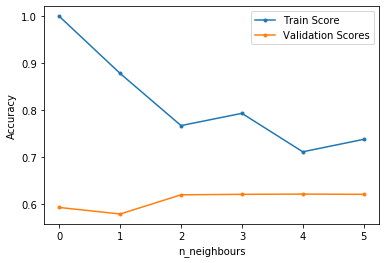

In [296]:
plt.plot(train_scores,label="Train Score",marker='.')
plt.plot(validation_scores,label="Validation Scores",marker='.')
#plt.xscale('log')
plt.xlabel('n_neighbours')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As we can see that from the graph the train and validation scores appear to be closer at the 3 and the accuracy is higher at this point too, so let's assume the n_neighbors to be 3 and calculate our test score and see if it has improved.

In [335]:
# Renaming our data sets since they were changed 
# Selecting our features for train set except our target column
X_train= train_data.drop(columns= ['Reviewer_Score'])

# Selecting our target variable for the train set
y_train= train_data['Reviewer_Score']

# Similarly our test sets can also be stated
X_test= test_data.drop('Reviewer_Score', axis= 1)
y_test= test_data['Reviewer_Score']

# Rechecking
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13651, 2586), (13651,), (3413, 2586), (3413,))

In [336]:
# Importing library for KNN
from sklearn.neighbors import KNeighborsClassifier

# instantiate
my_knn = KNeighborsClassifier(n_neighbors= 3, n_jobs= -1)

#fit
my_knn.fit(X_train, y_train)

#Scoring 
train_accuracy = my_knn.score(X_train, y_train)
test_accuracy = my_knn.score(X_test, y_test)


print('Train accuracy : ', train_accuracy)
print('Test accuracy :', test_accuracy)

Train accuracy :  0.8118086587063219
Test accuracy : 0.6484031643715207


#### This is the best accuracy we get for our k_neighbors= 3 which gives us a training accuracy of 0.64

### 2.5 What is the issue with splitting the data into train and validation sets after performing vectorization?

If we split the data into train and validation set after vectorization, we are inadvertently carrying information from the train set over to the validation set.When we fit the vectorizer on the whole dataset and transform both the train and validation sets with it. There will be some words that are only in the train set and some only in the validation set. But since we did the split after the vectorizing, all the words are vectorized. There is a huge chance of data leakage.

### 3. Employ a Decision Tree classifier on this dataset:

### 3.1 Fit a decision tree model to this data. What is the accuracy score on the test set?

In [337]:
# Importing our library
from sklearn.tree import DecisionTreeClassifier

# Initiating our model
tree_model= DecisionTreeClassifier(random_state= 2)

# Fitting our model
tree_model.fit(X_train, y_train)

# Scoring our model on our test test
print(f' The test score for our data is : {tree_model.score(X_test,y_test)}')

 The test score for our data is : 0.7037796659830061


The accuracy score we get without any hyper parameter tuning of the test set is 0.70

### 3.2 Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. You will need to split your data set into train and validation.

Let's do 20% of our train set to be validation set so that we can check which value should we pick for our max_depth hyper parameter.

In [291]:
### Decision Tree ###

from sklearn.tree import DecisionTreeClassifier

# Creating empty lists for our scores to use them later
                                                    
validation_scores = []
train_scores = []

# Let's create an a range of 
max_depth_range = np.arange(1, 18)

# Taking a chuck for our 30% test set
X_train, X_validation, y_train, y_validation= train_test_split(X_train, y_train, test_size= 0.3 ,random_state= 3)

for d in max_depth_range:
    # Iniatialising, scoring and fitting our model
    my_DT = DecisionTreeClassifier(max_depth = d, random_state= 3)
    my_DT.fit(X_train, y_train)
    decision_train_score= my_DT.score(X_train, y_train)
    
    # Appending the scores to our list
    train_scores.append(my_DT.score(X_train, y_train))
    
    # score on validation set
    decision_validation_score= my_DT.score(X_validation, y_validation)
    
    validation_scores.append(my_DT.score(X_validation, y_validation))
 
    print(f' For max_depth {d} the train score is {decision_train_score} and validation score is {decision_validation_score}')

 For max_depth 1 the train score is 0.6393540669856459 and validation score is 0.6341123125217998
 For max_depth 2 the train score is 0.7051435406698564 and validation score is 0.692361353331008
 For max_depth 3 the train score is 0.7215909090909091 and validation score is 0.7118939658179282
 For max_depth 4 the train score is 0.7441686602870813 and validation score is 0.7279386117893268
 For max_depth 5 the train score is 0.7606160287081339 and validation score is 0.7359609347750261
 For max_depth 6 the train score is 0.7816985645933014 and validation score is 0.7439832577607255
 For max_depth 7 the train score is 0.7957535885167464 and validation score is 0.730728985001744
 For max_depth 8 the train score is 0.816238038277512 and validation score is 0.7310777816532962
 For max_depth 9 the train score is 0.8323863636363636 and validation score is 0.7251482385769097
 For max_depth 10 the train score is 0.8516746411483254 and validation score is 0.7220090687129403
 For max_depth 11 the 

Let's make a plot so that we can visualize which max_depth fits our model better

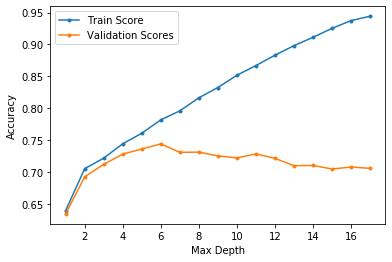

In [292]:
plt.figure()
plt.plot(max_depth_range, train_scores,label="Train Score",marker='.')
plt.plot(max_depth_range, validation_scores,label="Validation Scores",marker='.')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As the graph helped us understand the best value for our max_Depth parameter, we can see that at max_depth= 6 we get the best fit i.e both the train and validation scores have better accuracy and after 6 the model trains too much on the training data, so we can select 6 to be our optimum value for max_Depth.

In [335]:
# Renaming our data sets since they were changed 
# Selecting our features for train set except our target column
X_train= train_data.drop(columns= ['Reviewer_Score'])

# Selecting our target variable for the train set
y_train= train_data['Reviewer_Score']

# Similarly our test sets can also be stated
X_test= test_data.drop('Reviewer_Score', axis= 1)
y_test= test_data['Reviewer_Score']

# Rechecking
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13651, 2586), (13651,), (3413, 2586), (3413,))

In [338]:
DC_tree = DecisionTreeClassifier(max_depth=6, random_state= 3)
DC_tree.fit(X_train, y_train)

train_acc = DC_tree.score(X_train, y_train)
test_acc = DC_tree.score(X_test, y_test)

print(f"Depth 6 | Train accuracy: {train_acc} | Test accuracy: {test_acc}")

Depth 6 | Train accuracy: 0.7625814958611091 | Test accuracy: 0.7562261939642543


This is the best score we achieved so far based on our optimisation for max_depth of 6 which is 0.756 for out test score data.

### 3.3 Provide two advantages of decision trees over KNN. Provide two weaknesses of decision trees (classification or regression trees)

#### Advantages:
- Since KNN performs on-the-spot learning, it requires frequent database lookups, hence, can be computationally expensive. Decision Tree Classifier does not require such lookups as it has in-memory classification model ready.
- Decision tree supports automatic feature interaction, whereas KNN cant.

#### Disadvantages:
- For decision trees there are more chances for overfitting the model if we keep on building the tree to achieve high purity whereas for KNN there's less.
- There's a high chance for a decision tree to loose valuable information while handling continuous variables and less chance for a KNN.

### 4. What is the purpose of the validation set, i.e., how is it different than the test set? 

Validation set is used to tune a model's hyperparameters, such as the regularization penalty in logistic regression. This serves as a somewhat unbiased estimate of the model's performance. Since the model is not fitted on this data it should not overfit when using the `fit` parameter to it.
While a test set is not touched or peaked into since it has to be unbiased for prediction. With a validation set we can use it to fine tune our hyper parameter which in turn  helps us in getting better prediction for our test set

### 5. Re-run a decision tree or logistic regression on the data again:

### 5.1 Perform a 5-fold cross validation to optimize the hyperparameters of your model.

For this k-fold let's try doing a 5 k-fold with logistic regression and loop over our C values to find the best parameter for our model.

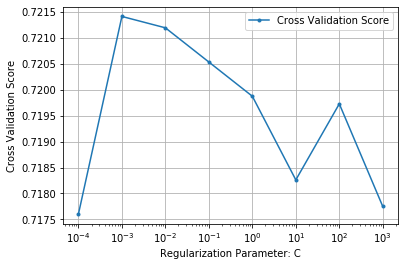

The best model has C =  0.001


In [339]:
# Let's start with importing our libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Making a list of our scores to loop them over
cross_validation_scores = []

C_range = [10**n for n in range(-4,4)]

#Doing a 5 fold cross validation with logistic regression
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=1)
    cv_score = np.mean(cross_val_score(LR_model, X_train, y_train, cv = 5, n_jobs= -1))
    cross_validation_scores.append(cv_score)

    
# Let's make a plot to hava a better visualization of our values
plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

# We can print out the best model by gettingt the max score
which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ",C_range[which_max])

In [346]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13651, 2586), (13651,), (3413, 2586), (3413,))

As we can see the from the graphs, our best model would be when C= 0.001 because it has the highest cross validation sore for logistic regression for k-folds 5 which is the best standard practice.

### 5.2 What does your confusion matrix look like for your best model on the test set?

For our confusion matrix, we need to fit our best model and get predicted values so that we can plot them in a matrix.

In [341]:
#Scaling and transforming our data for better accuracy

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [385]:
# Initiating, fitting and scoring our model 
log_model = LogisticRegression(C= 0.001,random_state=1)
log_model.fit(X_train_scaled, y_train)
print(f' Test score for our scaled test data is: {log_model.score(X_test_scaled, y_test)}')

 Test score for our scaled test data is: 0.774099033108702


In [343]:
# Getting our predictions for train and test set
y_train_pred= log_model.predict(X_train_scaled)
y_test_pred= log_model.predict(X_test_scaled)


In [344]:
# Checking our data
y_test_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 1.

Let's plot our confusion matrix now, with our true column values and our predicted values for both training and test data sets.

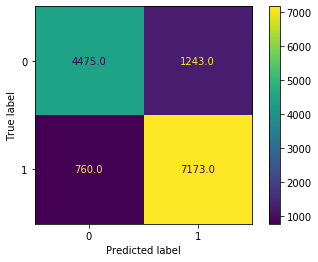

In [374]:
# Confusion matrix for our train sets
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(conf_matrix_train, display_labels= (0,1)).plot(values_format= '.1f')

As we got an accuracy of ~77% the confusion matrix seems to look normal, we can see here that for our 'Reviewer score' column: our model predicted the value 0 for bad review correctly for 4475 rows and predicted good review i.e 1, wrongly for 1243 rows.\
Whereas, our model predicted the review 1 to be good review correctly for 7173 rows and wrongly predicted 0 bad review for 760.

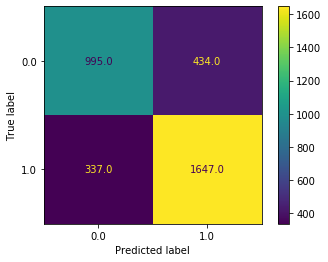

In [376]:
# Similarly let's do a confusion matrix for our test data
from sklearn.metrics import ConfusionMatrixDisplay
conf_matrix_train = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix_train, display_labels= y_test.values).plot(values_format= '.1f')

Similarly for our predictions of test sets for our model:\
Our model predicted the review to be 0 correctly for 995 rows and wrongly predicted 1 for 434 rows.\
Also for the good review 1 our model correctly predicted for 1647 rows and wrongly for 337 rows, which seems normal in our dat set.

We can also recheck with our matrix and see if our values align:

In [377]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[4475, 1243],
       [ 760, 7173]], dtype=int64)

In [382]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[ 995,  434],
       [ 337, 1647]], dtype=int64)

All checks out perfectly!

### 6. Create one new feature of your choice:

### 6.1 Explain your new feature and why you consider it will improve accuracy.

In [386]:
X_train

Additional_Number_of_Scoring  Average_Score  \
0                             220.0            9.1   
1                            1190.0            7.5   
2                             299.0            8.3   
3                              87.0            9.0   
4                             317.0            7.6   
...                             ...            ...   
13646                         279.0            8.2   
13647                         641.0            8.7   
13648                         359.0            9.3   
13649                         704.0            8.3   
13650                         807.0            8.5   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                   20.0                    902.0   
1                                    5.0                   5180.0   
2                                   81.0                   1361.0   
3                                   17.0                    355.0   
4                                   14.0                   1458.0   
...                                  ...                      ...   
13646                               55.0                   1140.0   
13647                                0.0                   2130.0   
13648                               45.0                   1694.0   
13649                               16.0                   2443.0   
13650                                0.0                   3269.0   

       Review_Total_Positive_Word_Counts  \
0                                   21.0   
1                                   23.0   
2                                   27.0   
3                                   13.0   
4                                    0.0   
...                                  ...   
13646                                8.0   
13647                                5.0   
13648                               28.0   
13649                               24.0   
13650                               10.0   

       Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                             1.0              275.0   
1                                             6.0              481.0   
2                                             4.0              672.0   
3                                             7.0              412.0   
4                                             1.0              499.0   
...                                           ...                ...   
13646                                        13.0              462.0   
13647                                         3.0              338.0   
13648                                         9.0              452.0   
13649                                        19.0              179.0   
13650                                         2.0              456.0   

             lat       lng  Review_Month  Review_Day  Review_Year  \
0      51.494308 -0.175558          11.0         1.0       2016.0   
1      51.514879 -0.160650           4.0         9.0       2016.0   
2      51.521009 -0.123097          10.0         1.0       2015.0   
3      51.499749 -0.161524           6.0        17.0       2016.0   
4      51.516114 -0.174952           3.0        22.0       2016.0   
...          ...       ...           ...         ...          ...   
13646  51.492733 -0.157371           4.0        28.0       2016.0   
13647  51.542605 -0.007271           8.0        30.0       2016.0   
13648  51.508236 -0.126196           5.0         8.0       2016.0   
13649  51.491959 -0.220096           2.0         5.0       2017.0   
13650  51.493236 -0.126908           5.0         4.0       2016.0   

       Hotel_Name_11 Cadogan Gardens  Hotel_Name_41  \
0                                0.0            0.0   
1                                0.0            0.0   
2                                0.0            0.0   
3                                0.0            0.0   
4                              

As, we have have total positive review and negative review word counts, We can create a feature where if the number of negative word counts is more than the positive word counts we can put it to 0 indicating that negative review overtakes positive review.\
Similarly if the number of positive review word counts is more than negative word counts we can state it to be 1 which says that the positive review has more say in it.\
This would increase accuracy since it has weight in it whether the review is likely to be positive or negative.

Creating a new column, 'Review Sign' for our train and test data sets:

In [387]:
X_train['Review_Sign']= np.where(X_train['Review_Total_Negative_Word_Counts']> X_train['Review_Total_Positive_Word_Counts'], 0, 1)

In [391]:
X_test['Review_Sign']= np.where(X_test['Review_Total_Negative_Word_Counts']> X_test['Review_Total_Positive_Word_Counts'], 0, 1)

In [388]:
# Checking our new column
X_train

Additional_Number_of_Scoring  Average_Score  \
0                             220.0            9.1   
1                            1190.0            7.5   
2                             299.0            8.3   
3                              87.0            9.0   
4                             317.0            7.6   
...                             ...            ...   
13646                         279.0            8.2   
13647                         641.0            8.7   
13648                         359.0            9.3   
13649                         704.0            8.3   
13650                         807.0            8.5   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                   20.0                    902.0   
1                                    5.0                   5180.0   
2                                   81.0                   1361.0   
3                                   17.0                    355.0   
4                                   14.0                   1458.0   
...                                  ...                      ...   
13646                               55.0                   1140.0   
13647                                0.0                   2130.0   
13648                               45.0                   1694.0   
13649                               16.0                   2443.0   
13650                                0.0                   3269.0   

       Review_Total_Positive_Word_Counts  \
0                                   21.0   
1                                   23.0   
2                                   27.0   
3                                   13.0   
4                                    0.0   
...                                  ...   
13646                                8.0   
13647                                5.0   
13648                               28.0   
13649                               24.0   
13650                               10.0   

       Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                             1.0              275.0   
1                                             6.0              481.0   
2                                             4.0              672.0   
3                                             7.0              412.0   
4                                             1.0              499.0   
...                                           ...                ...   
13646                                        13.0              462.0   
13647                                         3.0              338.0   
13648                                         9.0              452.0   
13649                                        19.0              179.0   
13650                                         2.0              456.0   

             lat       lng  Review_Month  Review_Day  Review_Year  \
0      51.494308 -0.175558          11.0         1.0       2016.0   
1      51.514879 -0.160650           4.0         9.0       2016.0   
2      51.521009 -0.123097          10.0         1.0       2015.0   
3      51.499749 -0.161524           6.0        17.0       2016.0   
4      51.516114 -0.174952           3.0        22.0       2016.0   
...          ...       ...           ...         ...          ...   
13646  51.492733 -0.157371           4.0        28.0       2016.0   
13647  51.542605 -0.007271           8.0        30.0       2016.0   
13648  51.508236 -0.126196           5.0         8.0       2016.0   
13649  51.491959 -0.220096           2.0         5.0       2017.0   
13650  51.493236 -0.126908           5.0         4.0       2016.0   

       Hotel_Name_11 Cadogan Gardens  Hotel_Name_41  \
0                                0.0            0.0   
1                                0.0            0.0   
2                                0.0            0.0   
3                                0.0            0.0   
4                              

In [392]:
# Checking
X_test

Additional_Number_of_Scoring  Average_Score  \
0                           2288.0            8.1   
1                             61.0            9.0   
2                            974.0            9.0   
3                            838.0            8.4   
4                            879.0            8.8   
...                            ...            ...   
3408                         788.0            8.5   
3409                         377.0            8.5   
3410                        1427.0            8.8   
3411                        1258.0            9.4   
3412                        1444.0            7.8   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                  24.0                   9568.0   
1                                   0.0                    263.0   
2                                  20.0                   3040.0   
3                                  23.0                   3274.0   
4                                  48.0                   2768.0   
...                                 ...                      ...   
3408                               40.0                   2635.0   
3409                               27.0                   1363.0   
3410                                0.0                   4305.0   
3411                               20.0                   4204.0   
3412                               33.0                   5726.0   

      Review_Total_Positive_Word_Counts  \
0                                  16.0   
1                                  21.0   
2                                  20.0   
3                                  29.0   
4                                  51.0   
...                                 ...   
3408                                7.0   
3409                                4.0   
3410                                4.0   
3411                               31.0   
3412                               55.0   

      Total_Number_of_Reviews_Reviewer_Has_Given  days_since_review  \
0                                            1.0              527.0   
1                                            1.0              527.0   
2                                           12.0              485.0   
3                                            5.0              415.0   
4                                            1.0              385.0   
...                                          ...                ...   
3408                                         7.0              150.0   
3409                                         1.0              501.0   
3410                                         1.0               48.0   
3411                                         3.0               62.0   
3412                                         8.0              166.0   

            lat       lng  Review_Month  Review_Day  Review_Year  \
0     51.511099 -0.120867           2.0        23.0       2016.0   
1     51.522636 -0.160287           2.0        23.0       2016.0   
2     51.500732 -0.016550           4.0         5.0       2016.0   
3     51.495666 -0.145279           6.0        14.0       2016.0   
4     51.508354  0.019886           7.0        14.0       2016.0   
...         ...       ...           ...         ...          ...   
3408  51.512763 -0.099716           3.0         6.0       2017.0   
3409  51.515864 -0.120063           3.0        20.0       2016.0   
3410  51.557696 -0.283526           6.0        16.0       2017.0   
3411  51.502435 -0.000250           6.0         2.0       2017.0   
3412  51.493508 -0.183435           2.0        18.0       2017.0   

      Hotel_Name_11 Cadogan Gardens  Hotel_Name_41  \
0                               0.0            0.0   
1                               0.0            0.0   
2                               0.0            0.0   
3                               0.0            0.0   
4                               0.0            0.0   
...                             ...      

### 6.2 Run the model from question 5 again. You will have to re-optimize your hyperparameters. Has the accuracy score of your best model improved on the test set after adding the new feature you created?

In [407]:
#Scaling and transforming our data for better accuracy

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [398]:
# Initiating, fitting and scoring our model 
log_model = LogisticRegression(C= 0.001,random_state=1, n_jobs= -1)
log_model.fit(X_train_scaled, y_train)
print(f' Test score for our scaled test data is: {log_model.score(X_test_scaled, y_test)}')

 Test score for our scaled test data is: 0.7758570172868444


Let's do our cross validation with 5 folds on logistic regression.

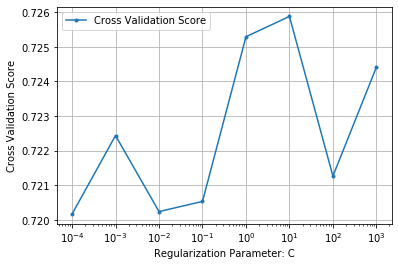

The best model has C =  10


In [408]:
from sklearn.model_selection import cross_val_score

# Making a list of our scores to loop them over
cross_validation_scores = []

C_range = [10**n for n in range(-4,4)]

#Doing a 5 fold cross validation with logistic regression
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=1, n_jobs= -1)
    cv_score = np.mean(cross_val_score(LR_model, X_train, y_train, cv = 5, n_jobs= -1))
    cross_validation_scores.append(cv_score)

    
# Let's make a plot to hava a better visualization of our values
plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

# We can print out the best model by gettingt the max score
which_max = np.array(cross_validation_scores).argmax()

print("The best model has C = ",C_range[which_max])

Though the best model shows a C_value 10 we can see that the model flatlines after 0.001 so it's likely that the model overfits after 0.001 and the accuracy score drops too but let's score the model on both the values and check our accuracy on our test scores.

In [409]:
# Initiating, fitting and scoring our model 
log_model = LogisticRegression(C= 10,random_state=1, n_jobs= -1)
log_model.fit(X_train_scaled, y_train)
print(f' Test score for our scaled test data is: {log_model.score(X_test_scaled, y_test)}')

 Test score for our scaled test data is: 0.7547612071491356


In [410]:
# Initiating, fitting and scoring our model 
log_model = LogisticRegression(C= 0.001,random_state=1, n_jobs= -1)
log_model.fit(X_train_scaled, y_train)
print(f' Test score for our scaled test data is: {log_model.score(X_test_scaled, y_test)}')

 Test score for our scaled test data is: 0.7758570172868444


As we can see that the test accuracy for C= 10 is a bit lower than for C= 0.001 but is a bit higher than before we addded the feature to our model.\
The accuracy score without our added feature was 0.774 and with our feature it's 0.7758.\
**So concluding our new feature did add an increase in the accuracy.**